In [19]:
import pandas as pd
df=pd.read_csv("/Users/anishjain/Downloads/dataset.csv")
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [20]:
print(df.tail())  # ending 5 rows

df.isnull().sum()

          id                                          title  \
9995   10196                             The Last Airbender   
9996  331446                       Sharknado 3: Oh Hell No!   
9997   13995                                Captain America   
9998    2312  In the Name of the King: A Dungeon Siege Tale   
9999  455957                                         Domino   

                                                 genre original_language  \
9995                          Action,Adventure,Fantasy                en   
9996  Action,TV Movie,Science Fiction,Comedy,Adventure                en   
9997                        Action,Science Fiction,War                en   
9998                    Adventure,Fantasy,Action,Drama                en   
9999                             Thriller,Action,Crime                en   

                                               overview  popularity  \
9995  The story follows the adventures of Aang, a yo...      98.322   
9996  The sharks take 

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [21]:
print(df.size)    # size
print(df.shape)   # no of rows and columns

print(df.describe())  #  describe the columns 
print(df.columns)

90000
(10000, 9)
                  id    popularity  vote_average    vote_count
count   10000.000000  10000.000000  10000.000000  10000.000000
mean   161243.505000     34.697267      6.621150   1547.309400
std    211422.046043    211.684175      0.766231   2648.295789
min         5.000000      0.600000      4.600000    200.000000
25%     10127.750000      9.154750      6.100000    315.000000
50%     30002.500000     13.637500      6.600000    583.500000
75%    310133.500000     25.651250      7.200000   1460.000000
max    934761.000000  10436.917000      8.700000  31917.000000
Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')


In [22]:
df.fillna('', inplace=True)


In [23]:

df.isnull().sum()


id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [24]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10000.0,NaN,NaN,NaN,161243.505,211422.046043,5.0,10127.75,30002.5,310133.5,934761.0
title,10000,9661,Beauty and the Beast,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,10000,2124,Comedy,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,10000,43,en,7810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,10000,9986,,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,10000.0,NaN,NaN,NaN,34.697267,211.684175,0.6,9.15475,13.6375,25.65125,10436.917
release_date,10000,6113,2017-10-20,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,10000.0,NaN,NaN,NaN,6.62115,0.766231,4.6,6.1,6.6,7.2,8.7
vote_count,10000.0,NaN,NaN,NaN,1547.3094,2648.295789,200.0,315.0,583.5,1460.0,31917.0


In [25]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
movie_counts = df['release_date'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)',  
    font_color='white', 
    title='Number of Movies Released Each Year',  
    xaxis=dict(title='Year'),  
    yaxis=dict(title='Number of Movies')
)
fig.update_traces(marker_color='red')
fig.show()

In [26]:

movie_counts = df['genre'].value_counts()
fig = go.Figure(data=go.Pie(labels=movie_counts.index, values=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)',  
    font_color='white', 
    title='Distribution Of C. Types',  
    
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

In [27]:
import plotly.express as px
top_countries = df['original_language'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Top Countries with Highest Number of Movies',
)
fig.show()

In [29]:
ratings       = list(df['vote_average'].value_counts().index)
rating_counts = list(df['vote_average'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)
fig.show()

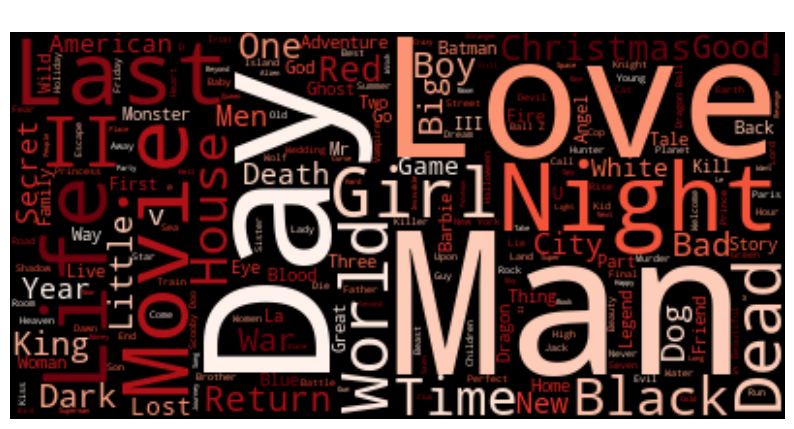

In [30]:
from wordcloud import WordCloud
import pickle
titles = df['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()


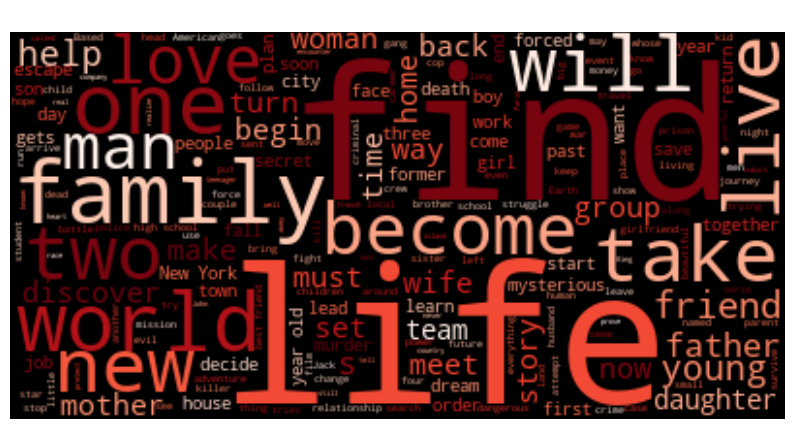

In [31]:
titles = df['overview'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()


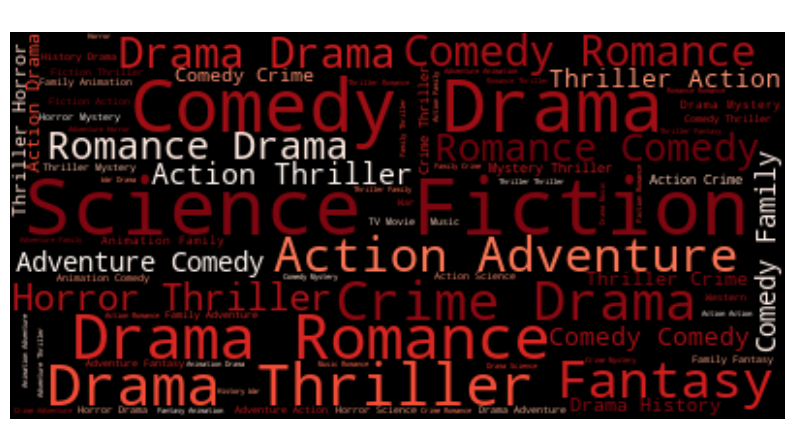

In [32]:
titles = df['genre'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

In [33]:
df

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668


In [35]:
df['tags']=df['genre']+df['overview']


In [36]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,"Drama,CrimeIn the continuing saga of the Corle..."


In [38]:
new_df=df[['id','title','genre','overview','tags']]


In [39]:
new_df.head()

,id,title,genre,overview,tags
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o...","Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,"Drama,CrimeIn the continuing saga of the Corle..."


In [40]:
new_df=new_df.drop(columns=['genre','overview'])
new_df.head()

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,CrimeIn the continuing saga of the Corle..."


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000,stop_words='english')
cv

CountVectorizer(max_features=10000, stop_words='english')

In [42]:
vec=cv.fit_transform(new_df['tags'].values.astype('U')).toarray()
vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10000, 10000))

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(vec)


In [44]:
sim

array([[1.        , 0.06253054, 0.05802589, ..., 0.07963978, 0.07597372,
        0.03481553],
       [0.06253054, 1.        , 0.08980265, ..., 0.        , 0.        ,
        0.        ],
       [0.05802589, 0.08980265, 1.        , ..., 0.02541643, 0.03636965,
        0.        ],
       ...,
       [0.07963978, 0.        , 0.02541643, ..., 1.        , 0.03327792,
        0.03049971],
       [0.07597372, 0.        , 0.03636965, ..., 0.03327792, 1.        ,
        0.04364358],
       [0.03481553, 0.        , 0.        , ..., 0.03049971, 0.04364358,
        1.        ]], shape=(10000, 10000))

In [57]:
new_df[new_df['title']=='The Shawshank Redemption']


,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."


In [58]:
dist=sorted(list(enumerate(sim[0])),reverse=True,key=lambda vec:vec[1])


In [59]:
dist

[(0, np.float64(1.0000000000000002)),
 (3709, np.float64(0.23539595453459985)),
 (9006, np.float64(0.22613350843332275)),
 (3649, np.float64(0.22019275302527214)),
 (2605, np.float64(0.20100756305184245)),
 (4068, np.float64(0.20100756305184245)),
 (6156, np.float64(0.20100756305184245)),
 (698, np.float64(0.19894589252079756)),
 (7324, np.float64(0.1976738731537168)),
 (1009, np.float64(0.1939524551505708)),
 (884, np.float64(0.1899342940993966)),
 (7271, np.float64(0.1899342940993966)),
 (2963, np.float64(0.18802535827258876)),
 (7478, np.float64(0.1877810107252081)),
 (2991, np.float64(0.1860968420796942)),
 (715, np.float64(0.18582615562066462)),
 (9520, np.float64(0.18148850216015694)),
 (2120, np.float64(0.17978662999019787)),
 (4201, np.float64(0.17912443020795962)),
 (9718, np.float64(0.17766726362967541)),
 (4295, np.float64(0.17407765595569785)),
 (4490, np.float64(0.17407765595569785)),
 (4491, np.float64(0.17407765595569785)),
 (5428, np.float64(0.17170914210964275)),
 (913

In [60]:
for i in dist[0:5]:
    print(new_df.iloc[i[0]].title)
    

The Shawshank Redemption
Anything for Her
The Getaway
The Woodsman
Pusher II


In [61]:
def recommend(movies):
    index=new_df[new_df['title']==movies].index[0]
    distance=sorted(list(enumerate(sim[index])),reverse=True,key=lambda vec:vec[1])
    for i in distance[0:5]:
        print(new_df.iloc[i[0]].title)
        

In [65]:
recommend("Home Alone")


Home Alone
Home Alone 2: Lost in New York
The Smurfs: A Christmas Carol
Surviving Christmas
Just Another Christmas
